In [1015]:
#Вам необходимо провести базовый EDA выбранного набора данных.
#Требования к анализу:
#    построить не менее 6 визуализаций различных видов;
#    каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
#    по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
#    в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix

import pandas as pd

df = pd.read_csv('D:/DS_data_sets/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4193 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

In [1016]:
df.sample(5)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
573,02/10/1940,NaN,"Near Cosenza, Italy",Ala Littoria SA,NaN,Catania - Brindisi - Rome,Savoia-Marchetti SM-75,I-LEAL,32031,10.0,4.0,6.0,10.0,4.0,6.0,0.0,Crashed and burned on a hill side in fog. Prio...
2776,02/22/1975,22:12,"Medellin, Colombia",Aerocondor,NaN,"Medellin, Colombia - Miami, Florida",Canadair CL-44,HK-1972,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,Minutes after taking off in a rainstorm the ri...
229,09/11/1930,NaN,"Croydon, England",Sabena,NaN,Croydon - Brussels,Sabca F-VII,OO-AIN,NaN,2.0,0.0,2.0,2.0,0.0,2.0,0.0,The plane caught on file shortly after taking ...
3278,09/16/1984,NaN,"Opole, Poland",APRL,NaN,Airshow,Antonov An-2T,SP-AMK,1G168-04,25.0,22.0,3.0,11.0,11.0,0.0,0.0,Crashed during takeoff. Overloaded
2967,09/14/1978,14:50,"Paranaque, Philippines",Philippine Air Force,NaN,Laoag - Paranaque,Fokker F-27 Friendship 200,PH-FKY,10328,28.0,24.0,4.0,21.0,17.0,4.0,12.0,The domestic flight crashed while attempting t...


In [1017]:
#удаление ненужных столбцов
df.drop(columns = ['Summary','cn/ln','Flight #'], axis = 1, inplace = True)
df.head()

,Date,Time,Location,Operator,Route,AC Type,Registration,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,2.0,1.0,1.0,1.0,1.0,0.0,0.0
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0


In [1018]:
#преобразование Date и объединение с Time
df['Date'] = df['Date'] + ' ' + df['Time']
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y %H:%M', errors = 'coerce')
df['Date']

0      1908-09-17 17:18:00
1                      NaT
2      1912-07-12 06:30:00
3                      NaT
4      1913-09-09 18:30:00
               ...        
4962   2019-04-16 11:00:00
4963   2019-05-05 18:30:00
4964   2019-05-05 18:30:00
4965   2019-06-03 13:00:00
4966   2019-07-30 02:00:00
Name: Date, Length: 4967, dtype: datetime64[ns]

In [1019]:
#удаление Time
df.drop('Time',axis = 1, inplace = True)
#время в 24 часовом формате

## Состав некоторых столбцов

In [1020]:
df['Location'].value_counts().head(20)

Moscow, Russia             17
Manila, Philippines        14
New York, New York         14
Sao Paulo, Brazil          13
Cairo, Egypt               13
Rio de Janeiro, Brazil     12
Bogota, Colombia           12
Chicago, Illinois          11
Near Moscow, Russia        11
Tehran, Iran               10
Ankara, Turkey              9
London, England             8
Rome, Italy                 8
Kunming, China              7
Burbank, California         7
Denver, Colorado            7
Amsterdam, Netherlands      7
Paris, France               7
Near Medellin, Colombia     7
Taipei, Taiwan              7
Name: Location, dtype: int64

In [1021]:
df['Operator'].value_counts().head(20)
#не удалять, можно использовать

Aeroflot                               255
Military - U.S. Air Force              140
Air France                              72
Deutsche Lufthansa                      63
United Air Lines                        44
China National Aviation Corporation     43
Military - U.S. Army Air Forces         43
Pan American World Airways              41
American Airlines                       37
US Aerial Mail Service                  35
KLM Royal Dutch Airlines                34
Indian Airlines                         34
Philippine Air Lines                    33
Military - Royal Air Force              32
Private                                 30
British Overseas Airways                29
Military - U.S. Navy                    29
Military - U.S. Army                    27
Eastern Air Lines                       25
Northwest Orient Airlines               25
Name: Operator, dtype: int64

In [1022]:
df['AC Type'].value_counts().head(20)
#не удалять

Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 64
Douglas DC-4                                 38
Yakovlev YAK-40                              35
Antonov AN-26                                34
Junkers JU-52/3m                             31
De Havilland DH-4                            27
Douglas C-47B                                27
Douglas DC-6B                                27
Breguet 14                                   22
Douglas DC-6                                 20
Antonov AN-24                                19
Curtiss C-46A                                19
Antonov AN-12                                18
Douglas C-47-DL                              18
Curtiss C-46                                 18
McDonnell Douglas DC-9-32                    18
Fokker F-27 Friendship 600                   17
Name: AC Type, dtype: int64

In [1023]:
#возможно участие нескольких самолетов, если есть '/' и в типе и в регистрации
df[(df['AC Type'].str.contains('/') == True) & (df['Registration'].str.contains('/') == True)]

,Date,Location,Operator,Route,AC Type,Registration,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
66,1922-04-07 13:15:00,"Grandvilliers, France",Daimler Airways / Grands Express Aeriens,Croydon - Le Bourget,de Havilland DH-18 / Farman F-60 Goliath,G-EAOW/FGEAD,7.0,5.0,2.0,7.0,5.0,2.0,0.0
183,1929-04-21 11:45:00,"San Diego, California",Maddux Airlines / Military - U.S.Army Air Force,San Diego - Phoenix,Ford 5-AT-B Tri-Motor / B-PW-9D,NC9636 / 28-037,6.0,3.0,3.0,6.0,3.0,3.0,0.0
376,1935-06-24 14:36:00,"Medellin, Colombia",Servicio Aereo Columbiano / SCADTA,Medellin - Bogotá,Ford Tri-Motor / Ford Tri-Motor,C-31 / F-31,20.0,18.0,2.0,17.0,15.0,2.0,0.0
490,1938-02-02 20:40:00,"Off San Clemente Island, California",Military - U.S. Navy / Military - U.S. Navy,Training,Consolidated PBY-2 / Consolidated PBY-2,04062 / 0463,14.0,0.0,14.0,11.0,0.0,11.0,0.0
690,1943-09-10 16:00:00,"Off Galveston, Texas",Military - U.S. Army Air Forces,NaN,Boeing B-17F / Boeing B-17F,42-4621/42-6031,22.0,0.0,22.0,22.0,0.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4461,2003-11-15 18:30:00,"Mosul, Iraq",Military - U.S. Army,NaN,UH-60 Black Hawk / UH-60 Black Hawk,? / ?,22.0,18.0,4.0,17.0,13.0,4.0,0.0
4564,2006-02-05 16:53:00,"Near Watertown, Wisconson",Air Cargo Carriers,NaN,Shorts 360-100 /Shorts 360-300,N3735W/N372AC,3.0,1.0,2.0,3.0,1.0,2.0,0.0
4589,2006-09-29 15:59:00,"Near Sao Felix do Araguaia , Brazil",Gol Airlines / Private,Manaus - Brasilia,Boeing B-737-8EH /EMB-135JB,PR-GTD / N600XL,161.0,153.0,8.0,154.0,148.0,6.0,0.0
4665,2008-06-29 15:48:00,"Flagstaff, Arizona",Air Methods / Classic Helicopters,Medical flight,Bell 407 / Bell 407,N407GA / N407MJ,7.0,5.0,2.0,6.0,4.0,2.0,0.0


In [1024]:
df[df['Registration'].str.contains('CCCP|RA-') == True]
#пока оставить, интересно

,Date,Location,Operator,Route,AC Type,Registration,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
194,NaT,"Sochi, Russia",Ukvozduchput,NaN,Kalinin K-4,CCCP-217,1.0,0.0,1.0,1.0,0.0,1.0,0.0
371,1935-05-18 00:45:00,"Near Moscow, Russia",Gor'ky Eskadril'ya,Demonstration,Tupolev ANT-20 / I-5,CCCP-I20,50.0,37.0,13.0,50.0,37.0,13.0,2.0
443,NaT,"Near Moscow, Russia",Deruluft,Berlin - Moscow,Antonov AN-9,CCCP-D311,14.0,11.0,3.0,9.0,7.0,2.0,0.0
468,NaT,"Bistrita, Romania",Aeroflot,NaN,Douglas DC-2,CCCP-M25,5.0,2.0,3.0,5.0,2.0,3.0,0.0
491,NaT,"Kandalaksha, Russia",TsAGI,Moscow - Murmansk,V6 (airship),CCCP-V6,19.0,0.0,19.0,13.0,0.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,2012-12-29 16:33:00,"Moscow, Russia",Red Wings Airlines,"Pardubice, Czech Republic - Moscow, Russia",Tupolev TU-204-100V,RA-64047,8.0,0.0,8.0,5.0,0.0,5.0,0.0
4903,2015-11-24 10:15:00,"Near Igarka, Russia",Turuhan Avia,Igarka - Krasnyi Selkub,Mil MI-8T,RA-2561,26.0,22.0,4.0,15.0,13.0,2.0,0.0
4926,2016-12-25 05:27:00,"Near Adar, Russia",Russian Air Force,Chkalovsky AB -Ader - Latakia,Tupolev 154B-2,RA-85572,92.0,84.0,8.0,92.0,84.0,8.0,0.0
4944,2018-02-11 14:31:00,"Argunovo, Russia",Saratov Airlines,Moscow - Orsk,Antonov AN-148-100,RA-61704,71.0,65.0,6.0,71.0,65.0,6.0,0.0


In [1025]:
df['Registration'].sample(5)

1073    AP-ACE
1864     T-102
1652    YR-PCC
2068    TC-ETI
731      32271
Name: Registration, dtype: object

In [1026]:
df['Route'].value_counts().head(20)
#удаление

Training                      92
Sightseeing                   31
Test flight                   22
Sao Paulo - Rio de Janeiro     7
Test                           6
Rio de Janeiro - Sao Paulo     5
Bogota - Barranquilla          4
Sao Paulo - Porto Alegre       4
Paris - London                 4
Tallinn - Helsinki             4
Huambo - Luanda                4
Villavicencio - Mitu           4
Croydon - Paris                4
Barranquilla - Bogota          4
Demonstration                  4
Kinshasa - Tshikapa            3
Guayaquil - Quito              3
Barrow - Wainwright            3
Amsterdam - Paris              3
Lagos - Abuja                  3
Name: Route, dtype: int64

In [1027]:
df.drop(columns = 'Route', axis = 1, inplace = True)
df.head()

,Date,Location,Operator,AC Type,Registration,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
0,1908-09-17 17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,NaN,2.0,1.0,1.0,1.0,1.0,0.0,0.0
1,NaT,"Juvisy-sur-Orge, France",NaN,Wright Byplane,SC1,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1912-07-12 06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0
3,NaT,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1913-09-09 18:30:00,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0


In [1028]:
df['Ground'].value_counts().head(20)
#пока оставляем

0.0       4684
1.0         59
2.0         34
3.0         21
4.0         16
5.0         12
7.0          9
8.0          9
10.0         6
14.0         5
6.0          5
13.0         4
11.0         4
22.0         4
19.0         4
12.0         3
24.0         3
44.0         3
20.0         3
2750.0       2
Name: Ground, dtype: int64

In [1029]:
df[df['Ground'] == 2750.0]
#не выброс, 11.09

,Date,Location,Operator,AC Type,Registration,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
4328,2001-09-11 08:47:00,"New York City, New York",American Airlines,Boeing 767-223ER,N334AA,92.0,81.0,11.0,92.0,81.0,11.0,2750.0
4329,2001-09-11 09:03:00,"New York City, New York",United Air Lines,Boeing B-767-222,N612UA,65.0,56.0,9.0,65.0,56.0,9.0,2750.0


## Пропуски

In [1030]:
df.isna().sum()
#во времени треть - пропуски
#пока пусть будут

Date                     1513
Location                    4
Operator                   10
AC Type                    15
Registration              273
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     41
dtype: int64

In [1031]:
df.dropna().count()
#все удалить нельзя

Date                     3303
Location                 3303
Operator                 3303
AC Type                  3303
Registration             3303
Aboard                   3303
Aboard Passangers        3303
Aboard Crew              3303
Fatalities               3303
Fatalities Passangers    3303
Fatalities Crew          3303
Ground                   3303
dtype: int64

In [1032]:
#пока пропуски ничем не заполняю

### Stat

In [1033]:
df.describe(include = 'all',datetime_is_numeric=True)


#Базово - оператор с самым большим числом катастроф - Аэрофлот
#Самый часто падающий самолет, независимо от класса - DC-3
#медианное количество жертв - 22 при медианном количестве людей на борту - 31, шанс есть)
#среднее количество погибших на земле - более 1, что неожиданно

,Date,Location,Operator,AC Type,Registration,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,3454,4963,4957,4952,4694,4949.000000,4738.000000,4741.000000,4959.000000,4725.000000,4726.000000,4926.000000
unique,NaN,4101,2242,2447,4661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,"Moscow, Russia",Aeroflot,Douglas DC-3,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,17,255,333,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1975-03-13 13:49:39.814707584,NaN,NaN,NaN,NaN,31.088301,26.898691,4.479646,22.338173,19.017566,3.579348,1.728177
min,1908-09-17 17:18:00,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1956-10-12 06:11:15,NaN,NaN,NaN,NaN,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,1973-08-25 00:12:30,NaN,NaN,NaN,NaN,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,1995-11-20 10:28:45,NaN,NaN,NaN,NaN,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,2019-07-30 02:00:00,NaN,NaN,NaN,NaN,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


In [1034]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   3454 non-null   datetime64[ns]
 1   Location               4963 non-null   object        
 2   Operator               4957 non-null   object        
 3   AC Type                4952 non-null   object        
 4   Registration           4694 non-null   object        
 5   Aboard                 4949 non-null   float64       
 6   Aboard Passangers      4738 non-null   float64       
 7   Aboard Crew            4741 non-null   float64       
 8   Fatalities             4959 non-null   float64       
 9   Fatalities Passangers  4725 non-null   float64       
 10  Fatalities Crew        4726 non-null   float64       
 11  Ground                 4926 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 465.

### Доп преобразования

In [1035]:
#Итог
df.sample(10)
#нужно разделить все ВС на типы:
#в операторе есть Military, Force - военные
#есть mail - почтовые
#экипаж до 2 человек включительно, а пассажиров меньше 4 - частное
#остальное - авиаперевозки

,Date,Location,Operator,AC Type,Registration,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
3809,1993-04-01 21:28:00,"Blountville, Tennesee",Private,Fairchild SA227-TT,N500AK,4.0,3.0,1.0,4.0,3.0,1.0,0.0
144,NaT,"Almeria, Spain",Aeropostale,Breguet 14,F-AFHN,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3549,1989-07-21 15:23:00,"Manila, Philippines",Philippine Air Lines,BAC One-Eleven 516FP,RP-C1193,98.0,91.0,7.0,1.0,1.0,0.0,8.0
2022,1963-03-20 03:23:00,"Monte Matto, Italy",Saudi Arabian Royal Flight,de Havilland Comet 4C,SA-R-7,18.0,9.0,9.0,18.0,9.0,9.0,0.0
891,1946-09-25 09:31:00,Near Hong Kong International Airport,Military - Royal Air Force,Douglas C-47B-25-DK,KN414,19.0,14.0,5.0,19.0,14.0,5.0,0.0
1394,NaT,"San Ramon Mtns., Costa Rica",LACSA,Douglas DC-3,TI-1002,17.0,14.0,3.0,9.0,6.0,3.0,0.0
3070,1980-06-12 15:46:00,"Valley, Nebraska",Air Wisconsin,Swearingen 226TC Metro II,N6505,15.0,13.0,2.0,13.0,11.0,2.0,0.0
43,NaT,"Pemberville, Ohio",US Aerial Mail Service,Junkers F-13,308,2.0,NaN,NaN,2.0,NaN,NaN,0.0
4861,NaT,"Near Cachimbo, Brazil",Heringer Taxi Aero,Britten Norman BN-2A-3 Islander,PT-WMY,5.0,3.0,2.0,5.0,3.0,2.0,0.0
2681,1973-08-15 14:50:00,"Don Don, Haiti",Private,Norman BN-2A-6,N38JA,10.0,9.0,1.0,10.0,9.0,1.0,0.0


In [1036]:
#Преобразовании типов ВС
def AC_class(row):
    if 'mil' in str(row['Operator']).lower(): return 'Military'
    elif 'mail' in str(row['Operator']).lower(): return 'Mail'
    elif (row['Aboard Crew'] <=2 and row['Aboard Passangers'] <=4) or 'private' in str(row['Operator']): return 'Private'
    else: return 'Passanger'

df['AC class'] = df.apply(AC_class, axis = 1)

In [1037]:
df.sample(10)

,Date,Location,Operator,AC Type,Registration,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,AC class
940,1947-02-14 04:20:00,"Denver, Colorado",Slick Airways,Curtiss C-46E,NC59486,2.0,0.0,2.0,2.0,0.0,2.0,0.0,Private
4822,NaT,"Hualla Hualla, Mount Mamarosa, Peru",HeliCusco,Sikorsly S-58ET,OB-1840-P,14.0,12.0,2.0,14.0,12.0,2.0,0.0,Passanger
2368,1969-01-05 01:34:00,"Gatwick Airport, Horley, Surrey, England",Ariana Afghan Airlines,Boeing B-727-113C,YA-FAR,62.0,54.0,8.0,48.0,43.0,5.0,2.0,Passanger
1472,1954-09-05 02:39:00,"Foynes, Ireland",KLM Royal Dutch Airlines,Lockheed 1049C-55-81 S Constellation,PH-LKY,56.0,46.0,10.0,28.0,25.0,3.0,0.0,Passanger
828,1945-11-22 10:00:00,"White's Farm, England",Military -Royal Air Force,Consolidated LB-30A Liberator,KH126,27.0,22.0,5.0,27.0,22.0,5.0,0.0,Military
2036,NaT,"Passo Fundo, Brazil",Varig,Douglas DC-3,PP-VBV,18.0,15.0,3.0,15.0,13.0,2.0,0.0,Passanger
3538,1989-06-17 08:28:00,"Berlin, Germany",Interflug,Ilyushin IL-62MK,DDR-SEW,113.0,103.0,10.0,20.0,20.0,0.0,1.0,Passanger
3746,NaT,"Saveh, Iran",Saha Airline Services,Fokker F-27 Friendship 400M,5-8815,39.0,35.0,4.0,39.0,35.0,4.0,0.0,Passanger
218,NaT,"Off Ceuta, Spain",Aeropostale,Latecoere 25,F-AJCL,2.0,0.0,2.0,2.0,0.0,2.0,0.0,Private
562,1939-08-13 16:35:00,"Rio de Janerio, Brazil",Pan American World Airways,Sikorsky S43 (flying boat),NC16933,16.0,12.0,4.0,14.0,10.0,4.0,0.0,Passanger


In [1038]:
#Была идея разобраться со странами, но нет, (особенно расстроили штаты США)
#операторы туда же
df.drop(columns = 'Location', axis = 1, inplace = True)
df.drop(columns = 'Operator', axis = 1, inplace = True)

In [1039]:
df.sample(10)

,Date,AC Type,Registration,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,AC class
4667,2008-07-06 02:15:00,Douglas DC9-15F,N199US,2.0,0.0,2.0,1.0,0.0,1.0,0.0,Private
168,NaT,Douglas M-4,NC792,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Private
2368,1969-01-05 01:34:00,Boeing B-727-113C,YA-FAR,62.0,54.0,8.0,48.0,43.0,5.0,2.0,Passanger
4584,2006-08-27 06:07:00,Canadair CRJ-200ER,N431CA,50.0,47.0,3.0,49.0,47.0,2.0,0.0,Passanger
2256,1967-03-12 14:28:00,Ilyushin IL-14P,CCCP-61657,19.0,15.0,4.0,15.0,11.0,4.0,0.0,Passanger
3165,1982-05-19 19:15:00,Westland Sea King HC-4 (helicopter),ZA-294,30.0,NaN,NaN,21.0,NaN,NaN,0.0,Military
2782,1975-03-20 23:15:00,Lockheed C-141A (L.300),64-0641,16.0,12.0,4.0,16.0,12.0,4.0,0.0,Military
2127,1965-02-06 08:36:00,Douglas DC-6B,CC-CCG-104,87.0,80.0,7.0,87.0,80.0,7.0,0.0,Passanger
4253,2000-05-17 09:47:00,Beechcraft 1900C-1,TR-LFK,10.0,8.0,2.0,3.0,2.0,1.0,0.0,Passanger
1250,1951-06-22 03:25:00,Lockheed 049 Constellation,N88846,40.0,31.0,9.0,40.0,31.0,9.0,0.0,Passanger


In [1040]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   3454 non-null   datetime64[ns]
 1   AC Type                4952 non-null   object        
 2   Registration           4694 non-null   object        
 3   Aboard                 4949 non-null   float64       
 4   Aboard Passangers      4738 non-null   float64       
 5   Aboard Crew            4741 non-null   float64       
 6   Fatalities             4959 non-null   float64       
 7   Fatalities Passangers  4725 non-null   float64       
 8   Fatalities Crew        4726 non-null   float64       
 9   Ground                 4926 non-null   float64       
 10  AC class               4967 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 427.0+ KB


### Graph

In [1041]:
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 17,8
df.sample(5)

,Date,AC Type,Registration,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,AC class
2660,1973-04-10 10:13:00,Vickers Vanguard 952,G-AXOP,145.0,139.0,6.0,108.0,104.0,4.0,0.0,Passanger
3120,1981-08-22 10:00:00,Boeing B-737-222,B-2603,110.0,104.0,6.0,110.0,104.0,6.0,0.0,Passanger
3576,1989-10-06 22:05:00,Cessna 208 Caravan I,N208W,5.0,3.0,2.0,5.0,3.0,2.0,0.0,Private
4042,1996-11-22 19:30:00,Lockheed HC-130P Hercules,64-14856,11.0,0.0,11.0,10.0,0.0,10.0,0.0,Military
653,NaT,Junkers JU-52/3m,D-AYGX,17.0,14.0,3.0,17.0,14.0,3.0,0.0,Passanger


<AxesSubplot:title={'center':'Динамика количества катастроф по годам и классам ВС'}, xlabel='Date', ylabel='crashes count'>

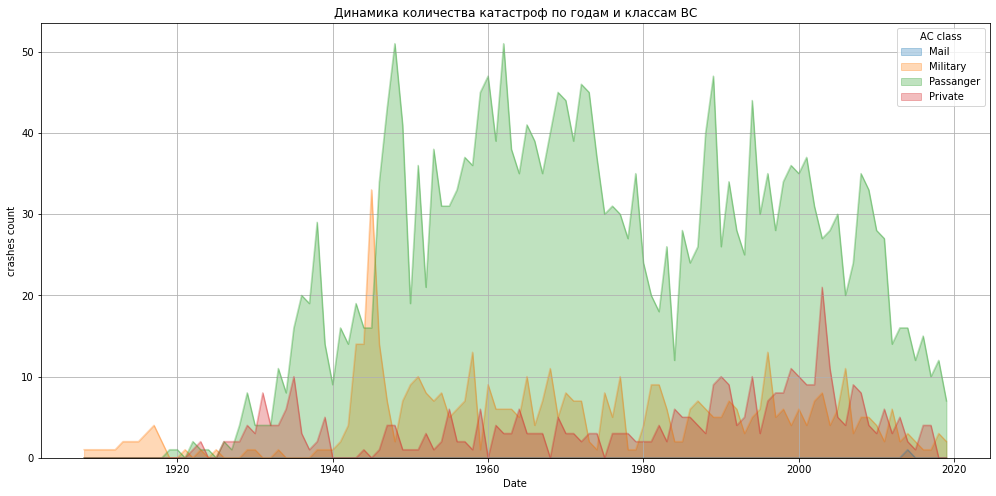

In [1042]:
#Количество катастроф по годам и классам ВС
df.pivot_table(index = df['Date'].dt.year, columns = 'AC class', 
               values = 'AC Type', aggfunc = 'count').plot(
    kind = 'area', alpha = 0.3, grid = True, stacked=False, ylabel = 'crashes count', 
    title = 'Динамика количества катастроф по годам и классам ВС')

#общая тенденция на снижение количества катастроф с 2010-х для всех классов ВС
#количество катастроф с участием пассажирских ВС более изменчиво, чем других классов
#количество катастроф военных ВС практически не меняется с годами
#количество катастроф с участием частных (по моей классификации) ВС имеет "выпуклость" на 2000-х
#количество катастроф военных ВС имеет пик в период 2-ой мировой

<AxesSubplot:title={'center':'Количество жертв по годам и классам ВС'}, xlabel='Date', ylabel='fatalities count'>

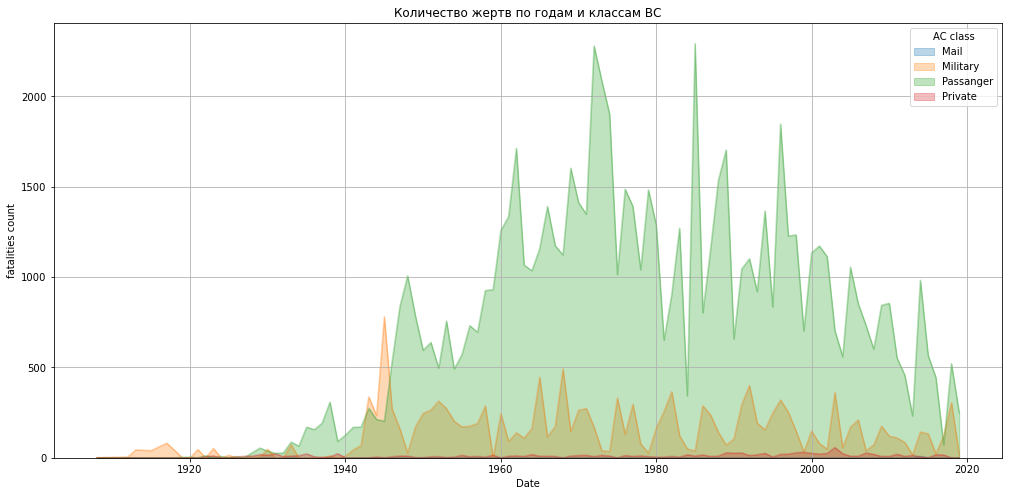

In [1043]:
#Количество жертв по годам и классам ВС
df.pivot_table(index = df['Date'].dt.year, columns = 'AC class', 
               values = 'Fatalities', aggfunc = 'sum').plot(
    kind = 'area', alpha = 0.3, grid = True, stacked=False, ylabel = 'fatalities count',
    title = 'Количество жертв по годам и классам ВС')

#жертв существенно больше именно у пассажирских ВС
#это, возможно, связано с бОльшим количеством человек на борту, по сравнению с другими классами

<AxesSubplot:title={'center':'Среднее количество человек на борту по годам и классам ВС'}, xlabel='Date', ylabel='aboard mean'>

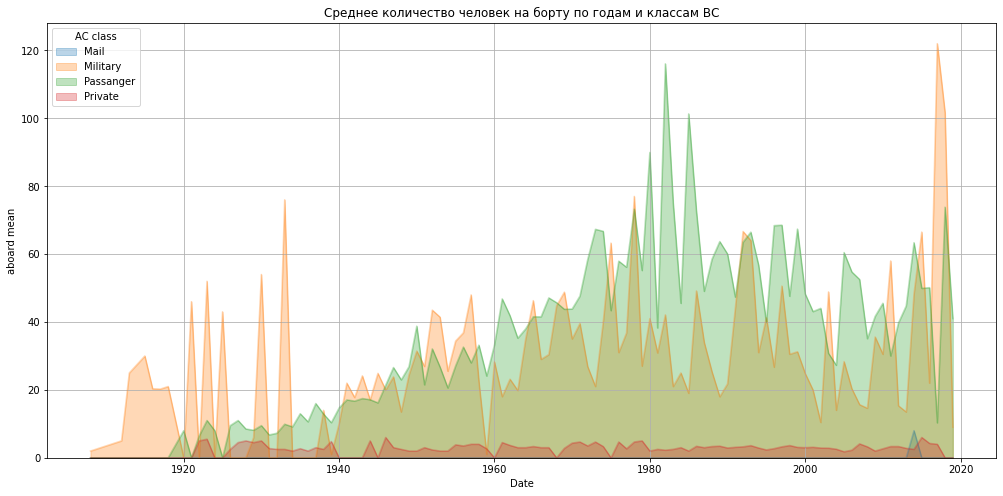

In [1044]:
#Среднее количество человек на борту по годам и классам ВС
#на privat внимание можно не обращать - в классификации заложено количество людей на борту
df.pivot_table(index = df['Date'].dt.year, columns = 'AC class', 
                              values = 'Aboard', aggfunc = 'mean',fill_value = 0).plot(
    kind = 'area', alpha = 0.3, grid = True, stacked=False, ylabel = 'aboard mean', 
    title = 'Среднее количество человек на борту по годам и классам ВС')

#количество людей на борту слабо зависит пассажирское это ВС или военное, вцелом у пассажирских немного больше
#количество людей на борут перестало существенно меняться с 80-х
#большее количество жертв у пассажирских ВС связано с более частыми катастрофами (к предыдущему графику)

<AxesSubplot:title={'center':'распределение количества жертв по количеству катастроф'}>

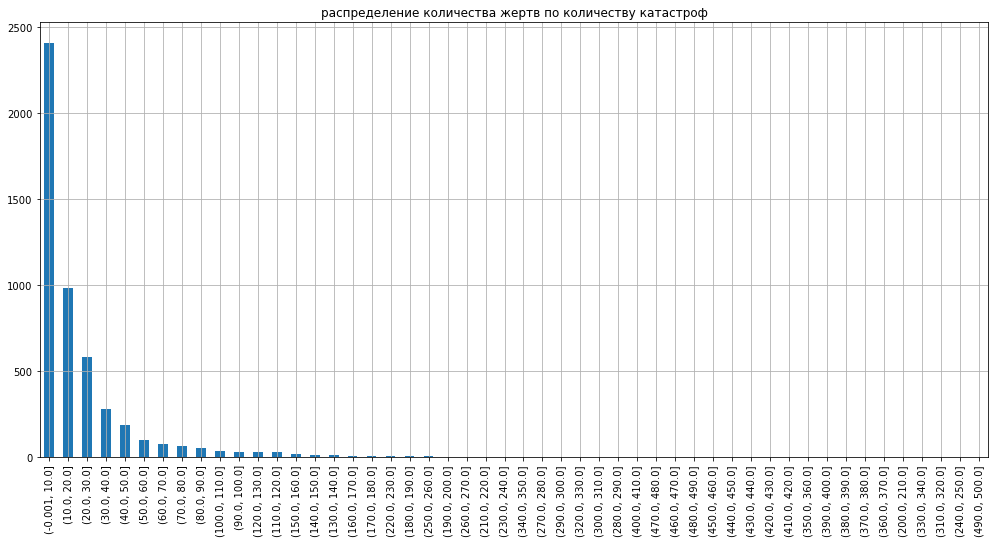

In [1045]:
#распределение количества жертв в % от общего числа

df['Fatalities'].value_counts(bins = list(range(0,510,10))).plot(
    kind = 'bar',grid = True,logy = False, title = 'распределение количества жертв по количеству катастроф')


#распределение количества жертв носит логарифмический характер
#в половине катастроф погибших до 10 человек

<AxesSubplot:title={'center':'Количество жертв на земле по десятилетиям и классам ВС'}, xlabel='Date', ylabel='fatalities count'>

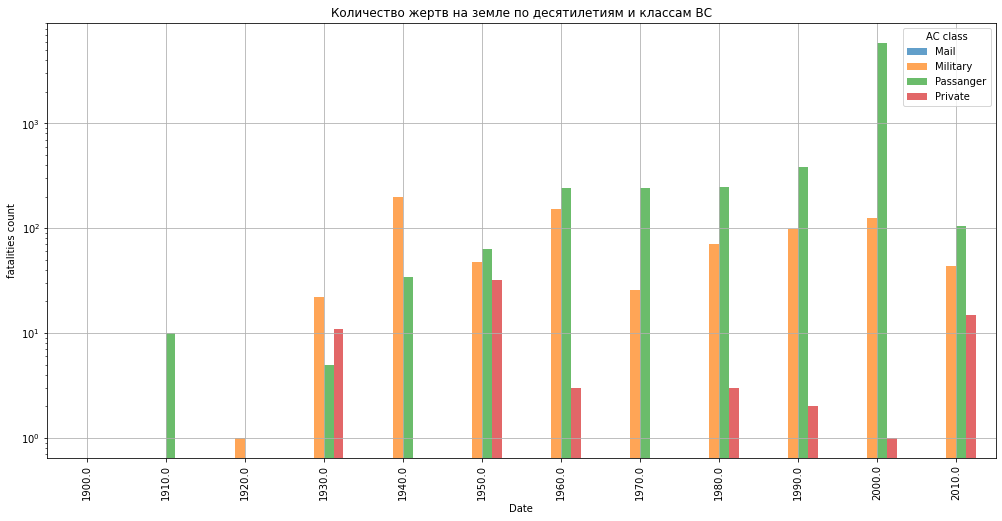

In [1046]:
#Количество жертв на земле по десятилетиям и классам ВС

#Количество жертв по годам и классас ВС
df.pivot_table(index = (df['Date'].dt.year//10)*10, columns = 'AC class', 
               values = 'Ground', aggfunc = 'sum').plot(
     kind = 'bar',alpha = 0.7, grid = True, ylabel = 'fatalities count', logy = True, 
    title = 'Количество жертв на земле по десятилетиям и классам ВС')

#до 50-х жерты на земле от военных ВС было больше чем от других классов
#со временем количество жертв на земле от гражданских стало преобладать
#2001 гол - лидер по данному признаку из-за 09.11
#почтовые ВС самые безопасные для людей на земле

AC class
Mail         0.000000
Military     0.093555
Passanger    0.289146
Private      0.089876
dtype: float64

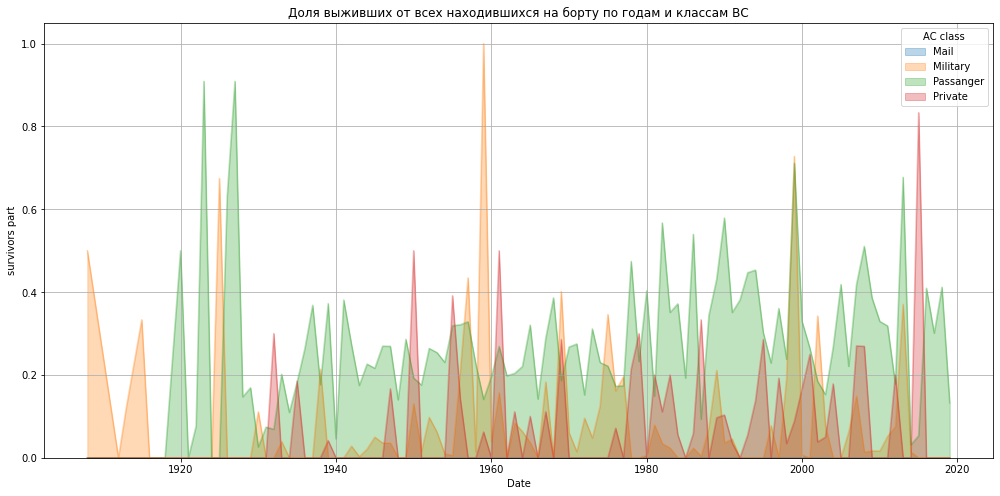

In [1047]:
#Доля выживших от всех находившихся на борту по годам и классам ВС
#(все на борту - погибшие)/ все на борту
#не все столбцы, так как применяется dropna и удаление пустот во всех столбцах только уменьшит выборку

aboard_pivot = df[['Date','AC class', 'Aboard','Fatalities']].dropna().pivot_table(
    index = df['Date'].dt.year, columns = 'AC class', values = 'Aboard', aggfunc = 'sum',fill_value = 0)
fatal_pivot = df[['Date','AC class', 'Aboard','Fatalities']].dropna().pivot_table(
    index = df['Date'].dt.year, columns = 'AC class', values = 'Fatalities', aggfunc = 'sum',fill_value = 0)

((aboard_pivot - fatal_pivot)/aboard_pivot).plot(
    kind = 'area', alpha = 0.3, grid = True, stacked=False, ylabel = 'survivors part', 
    title = 'Доля выживших от всех находившихся на борту по годам и классам ВС')

((aboard_pivot - fatal_pivot)/aboard_pivot).mean()

#Динамика выживаемости есть только у пассажирских ВС - слабо на увеличение
#шанс выжить в катастрофе пасажирского ВС - около 30% в среднем по всем годам

<AxesSubplot:ylabel='AC class'>

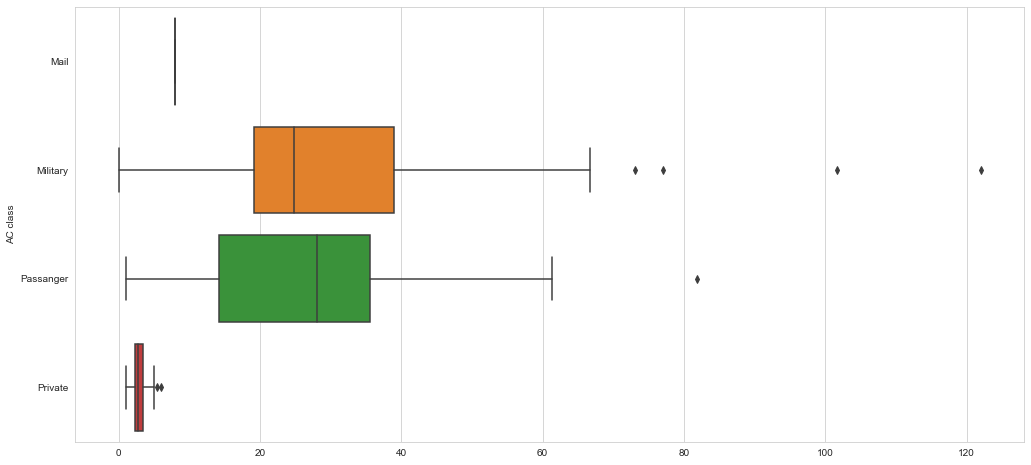

In [1062]:
#Распределние жертв по классам ВС
sns.set_style('whitegrid')
violin_pivot = df[['Date','Fatalities','AC class']].dropna().pivot_table(
    index = df['Date'].dt.year, columns = df['AC class'], 
    values = 'Fatalities', aggfunc = 'mean')

violin_pivot.head()
sns.boxplot(data=violin_pivot, orient = 'h')

#медиана у пассажирских выше чем у военных, скорее всего и на борту обычно у гражланских больше людей

<AxesSubplot:title={'center':'Доля случаев в которых выжил хотя бы один по годам'}, xlabel='Date'>

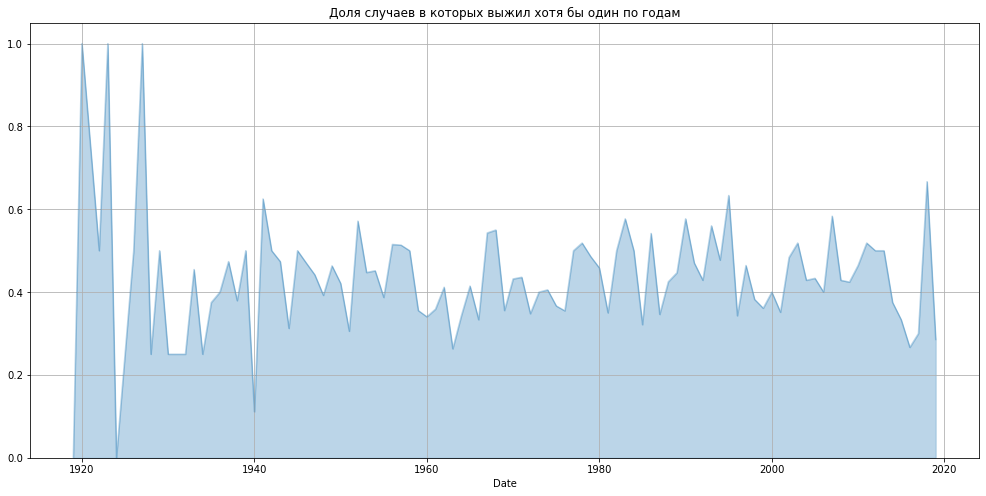

In [1049]:
#доля случаев в которых выжил хотя бы один по годам

(df[((df['Aboard'] - df['Fatalities'])>0) & (df['AC class'] == 'Passanger')].groupby(df['Date'].dt.year)['Date'].count() 
/ 
df[df['AC class'] == 'Passanger'].groupby(df['Date'].dt.year)['Date'].count()).plot(
    kind = 'area',grid = True, alpha = 0.3, title = 'Доля случаев в которых выжил хотя бы один по годам')

#статистика вцелом повеселее, чем просто выживаемость, почти в половине случаев выживает хотя бы один

<AxesSubplot:title={'center':'Топ 10 типов гражданских ВС по количеству катастроф'}, xlabel='воздушное судно', ylabel='количество катастроф'>

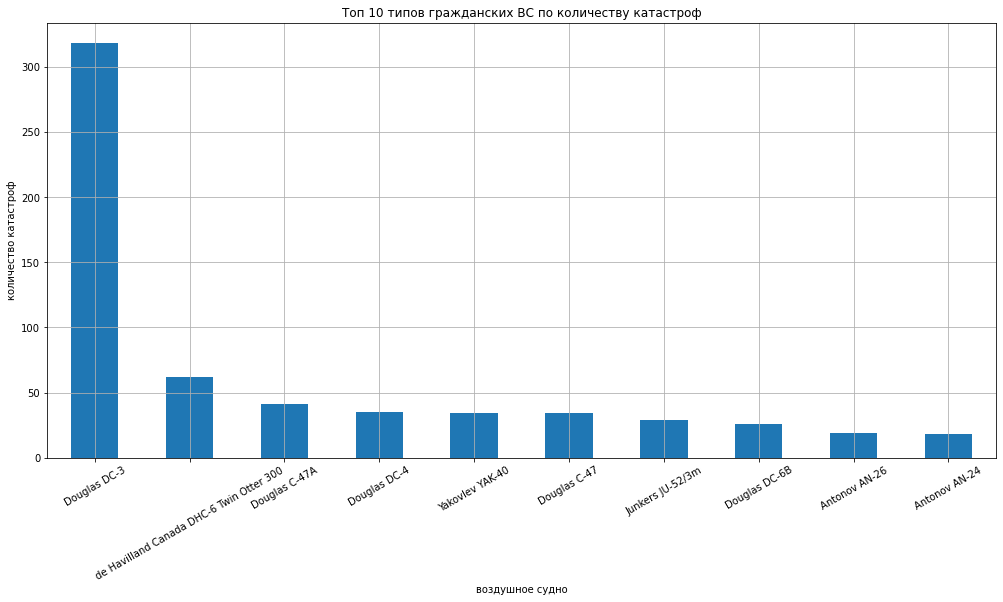

In [1050]:
#топ 10 типов гражданских ВС по количеству катаcтроф
df[df['AC class']== 'Passanger']['AC Type'].value_counts().head(10).plot(
    kind = 'bar',grid = True, title = 'Топ 10 типов гражданских ВС по количеству катастроф',
    xlabel = 'воздушное судно', ylabel = 'количество катастроф', rot = 30)

#DC-3 - лидер по количеству катастроф, к слову, он и самый массовый, но здесь жто не уситывается

<AxesSubplot:title={'center':'Топ 10 типов военных ВС по количеству катастроф'}, xlabel='воздушное судно', ylabel='количество катастроф'>

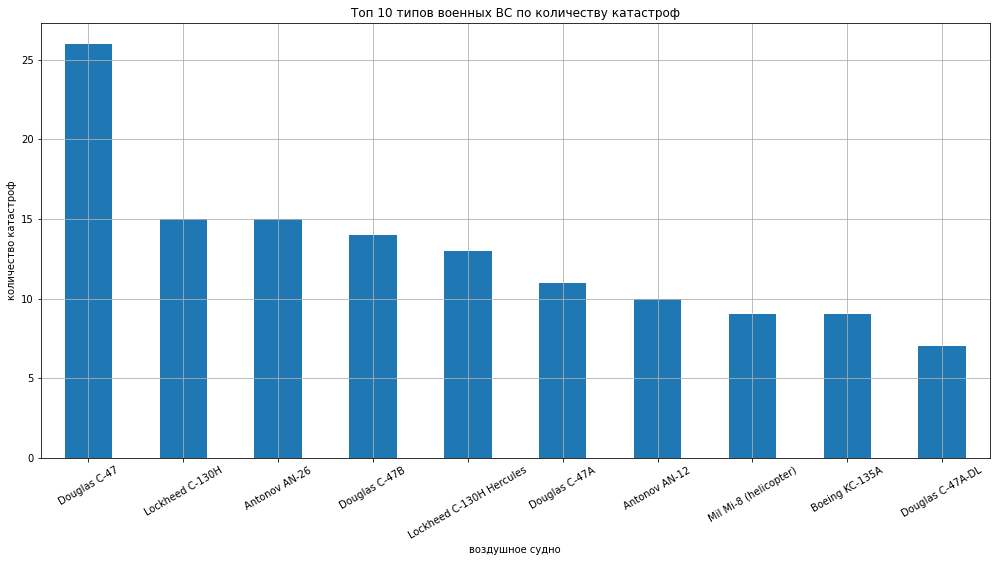

In [1051]:
#топ 10 типов военных ВС по количеству катаcтроф
df[df['AC class']== 'Military']['AC Type'].value_counts().head(10).plot(
    kind = 'bar',grid = True, title = 'Топ 10 типов военных ВС по количеству катастроф',
    xlabel = 'воздушное судно', ylabel = 'количество катастроф', rot = 30)

#И снова компания Douglas

<AxesSubplot:title={'center':'Топ 10 типов частных ВС по количеству катастроф'}, xlabel='воздушное судно', ylabel='количество катастроф'>

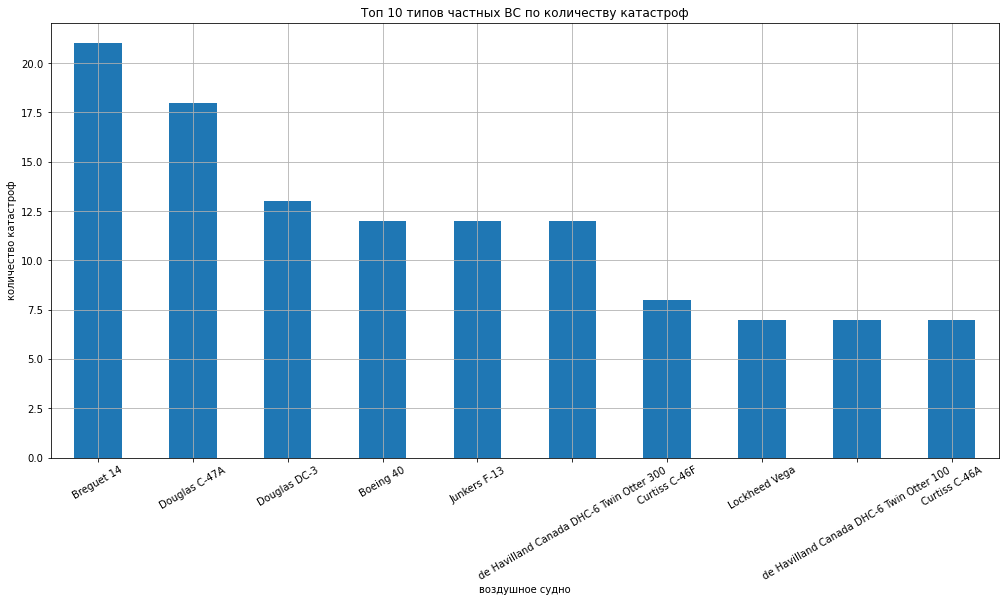

In [1052]:
#топ 10 типов частных ВС по количеству катаcтроф
df[df['AC class']== 'Private']['AC Type'].value_counts().head(10).plot(
    kind = 'bar',grid = True, title = 'Топ 10 типов частных ВС по количеству катастроф',
    xlabel = 'воздушное судно', ylabel = 'количество катастроф', rot = 30)

#статистика поспокойнее, без явных лидеров, хотя Douglas и тут есть

<AxesSubplot:title={'center':'Топ 10 гражданских типов ВС по количеству жертв'}, xlabel='воздушное судно', ylabel='количество жертв'>

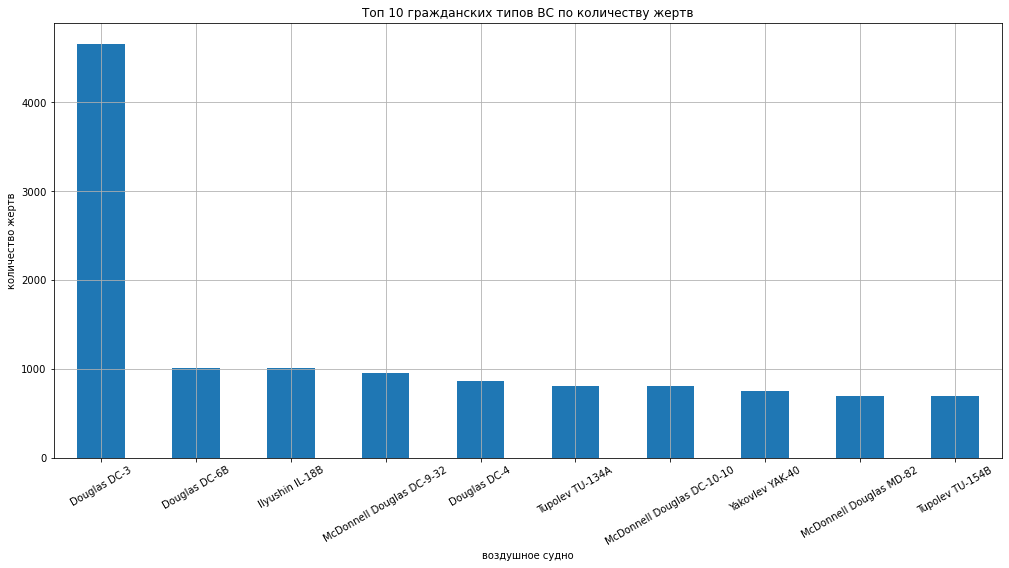

In [1053]:
#топ 10 гражданских ВС во количеству жертв
df[df['AC class'] == 'Passanger'].groupby('AC Type')['Fatalities'].sum().sort_values(ascending = False).head(10).plot(
    kind = 'bar',grid = True, title = 'Топ 10 гражданских типов ВС по количеству жертв',
    xlabel = 'воздушное судно', ylabel = 'количество жертв', rot = 30)

#Douglas DC-3 топ по количесту жертв и катастроф вообще

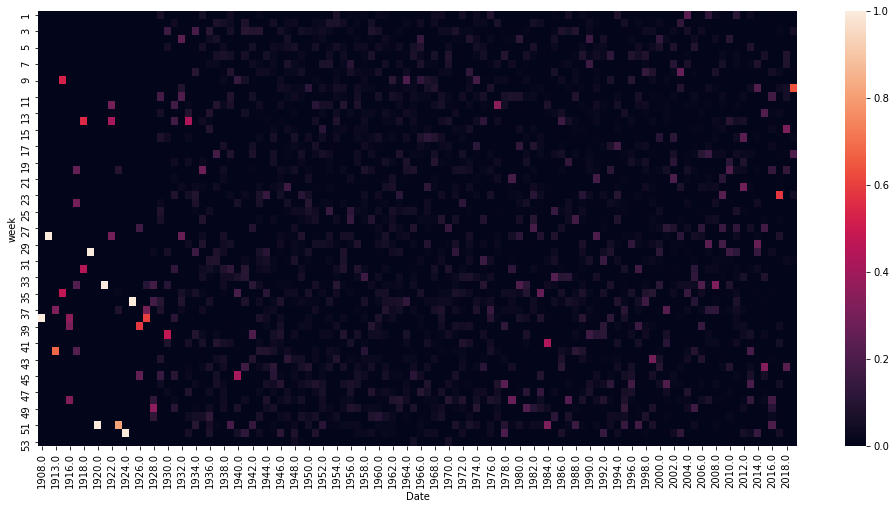

In [1054]:
#относительное количество жертв в каждой неделе за каждый
    
week_pivot = df[['Date','Fatalities']].dropna().pivot_table(
    index = df['Date'].dt.year, columns = df['Date'].dt.isocalendar().week, 
    values = 'Fatalities', aggfunc = 'sum',fill_value = 0).astype('float64') #перевод в float так как далее будет деление

def week_to_percent(row):
    _sum = row.sum()
    for i, el in enumerate(row.keys()):
        row[el] = row[el]/_sum
    return row

sns.heatmap(week_pivot.apply(week_to_percent, axis = 1).T)
sns.title = 'относительное количество жертв в каждой неделе за каждый'

#интересно, но бесполезно)
#как будто есть некие кластеры без катастроф, но систематизации не наблюдается

<AxesSubplot:xlabel='Date', ylabel='week'>

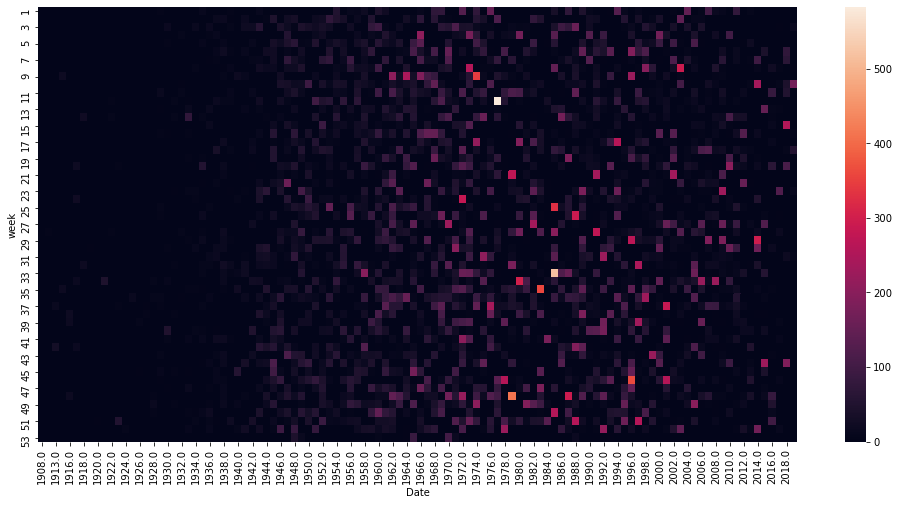

In [1055]:
#абсолютное количество жертв в каждой неделе в каждом году
    
week_abs_pivot = df[['Date','Fatalities']].dropna().pivot_table(
    index = df['Date'].dt.year, columns = df['Date'].dt.isocalendar().week, 
    values = 'Fatalities', aggfunc = 'sum',fill_value = 0).astype('float64') #перевод в float так как далее будет деление

sns.heatmap(week_abs_pivot.T)

#Можно быстро найти катастрофы с самым большим количеством жертв
#как будто есть некие кластеры без катастроф, но систематизации не наблюдается

<AxesSubplot:title={'center':'Сумарное количество катастроф гражданискх ВС по месяцам за все годы'}, xlabel='month'>

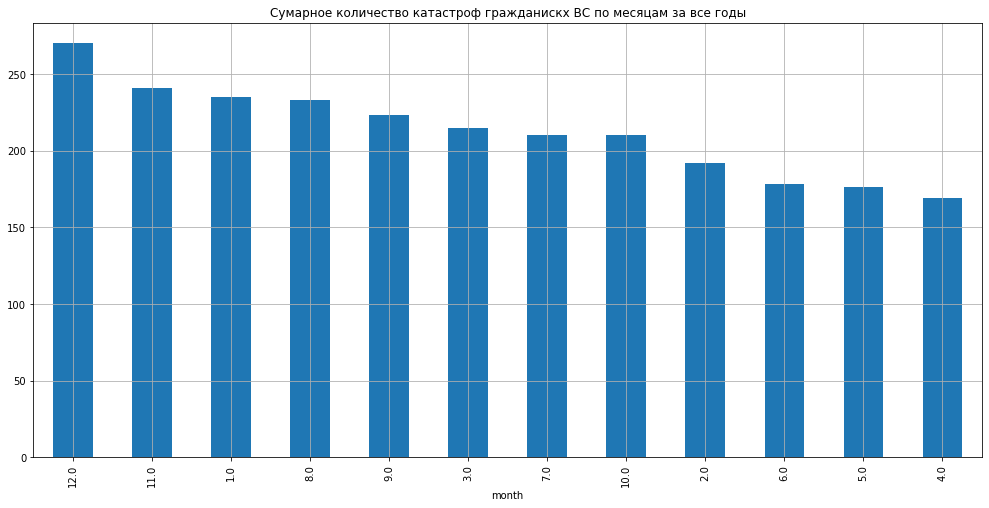

In [1056]:
#Количество катастроф гражданискх ВС по месяцам за все годы
df[df['AC class'] == 'Passanger'].groupby(df['Date'].dt.month)['AC class'].count().sort_values(ascending = False).plot(
    kind = 'bar',grid = True,title = 'Сумарное количество катастроф гражданискх ВС по месяцам за все годы', 
    xlabel = 'month')

#зимние месяцы - лидеры по количеству катастроф, возможно из-за плохих погодных условий или чего то еще, например
#из-за, в принципе, большей частоты полетов зимой, но это неизвестно

<AxesSubplot:title={'center':'Суммарное количество жертв в катастрофах гражданискх ВС по месяцам за все годы'}, xlabel='month'>

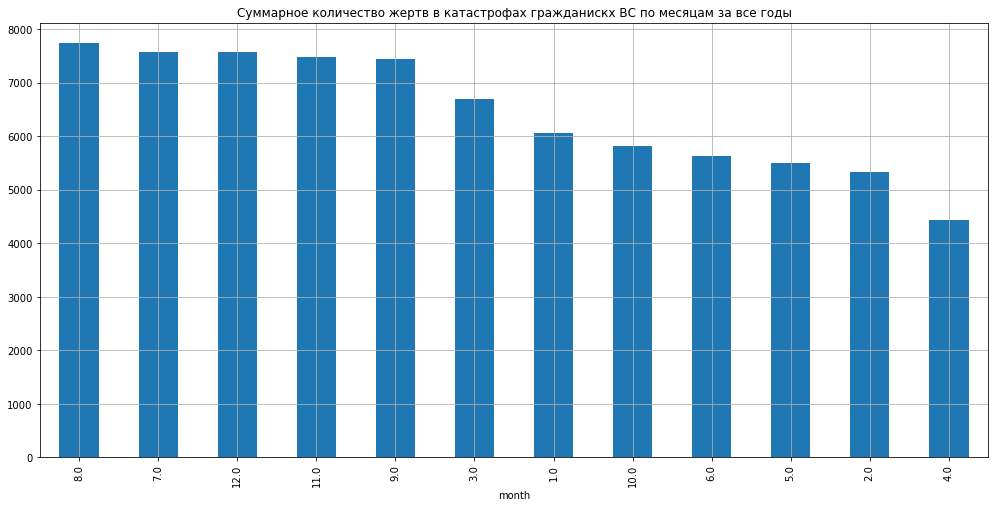

In [1057]:
#Суммарное количество жертв в катастрофах гражданискх ВС по месяцам за все годы
df[df['AC class'] == 'Passanger'].groupby(df['Date'].dt.month)['Fatalities'].sum().sort_values(ascending = False).plot(
    kind = 'bar',grid = True,title = 'Суммарное количество жертв в катастрофах гражданискх ВС по месяцам за все годы',
    xlabel = 'month')

#интерпретация без учета количества перевезенных людей по месяцам не даст ничего полезного
#возможно летом - много людей, а зимой - катастроф, но это не точно

<AxesSubplot:title={'center':'Медианное значение жертв в обычный год и в високосный'}, xlabel='Date'>

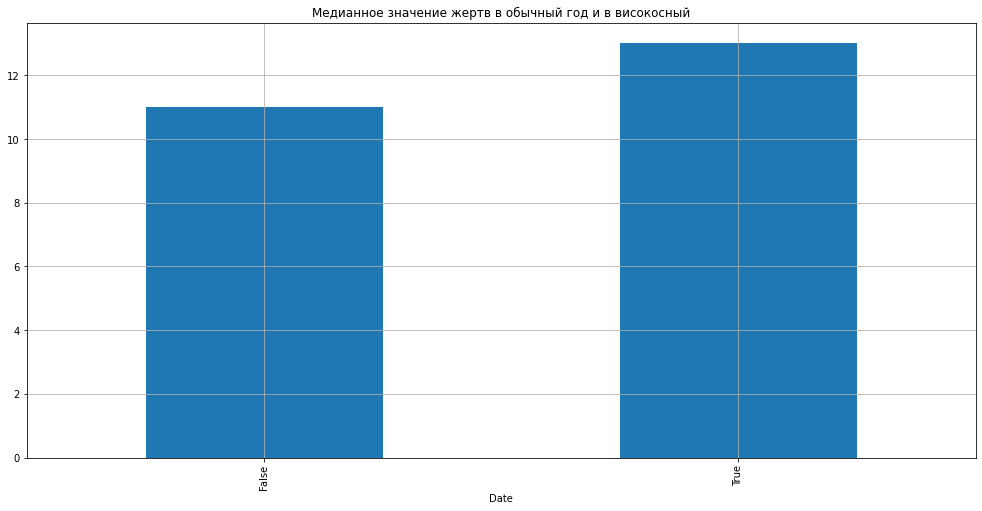

In [1058]:
#Влияние високосного года)


df.groupby(df['Date'].dt.is_leap_year)['Fatalities'].median().plot(
    kind = 'bar', grid = True, title = 'Медианное значение жертв в обычный год и в високосный')

#не хватает статистической значимости, отличие 11 от 13 так себе надежность, а также общего количества полетов по годам

Text(0.5, 1.0, 'Распределение количества жертв в зависимости от високосного года')

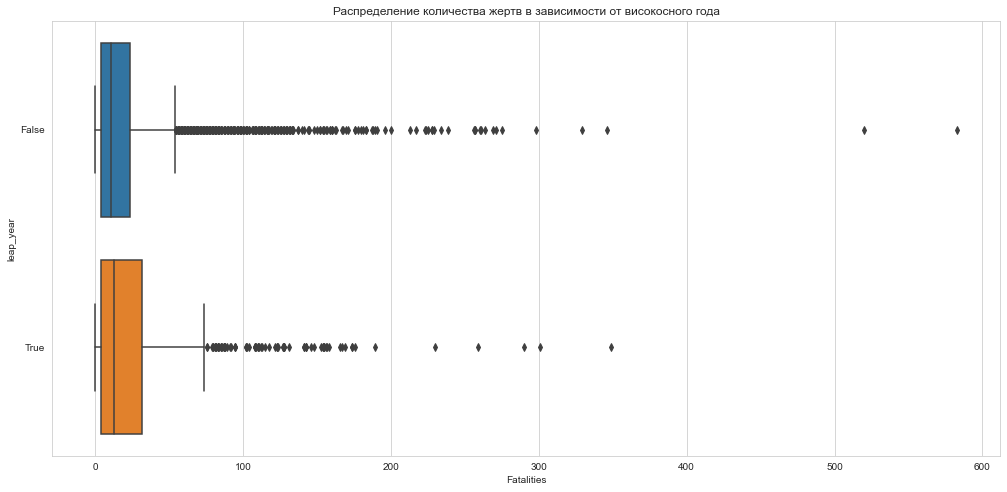

In [1061]:
#Распределение количества жертв в зависимости от високосного года

df['leap_year'] = df['Date'].dt.is_leap_year
sns.set_style('whitegrid')
sns.boxplot(data = df, y = 'leap_year', x = 'Fatalities',orient = 'h').set_title(
    'Распределение количества жертв в зависимости от високосного года')

#медианы практически идентичны
#в високосном году больший разброс по количеству жертв